**MergeSort**: $O(n\log(n))$

Text(0.5, 1.0, 'sequential implementation')

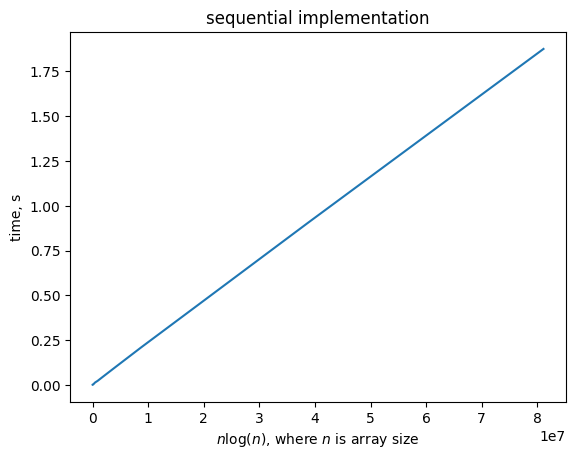

In [39]:
import matplotlib.pyplot as plt
from math import log

ns = [10 * (2**x) for x in range(20)]
ts = [1.8895e-05, 4.837e-06, 6.924e-06, 1.3636e-05, 2.7358e-05, 6.2806e-05, 0.000122387, 
      0.000295459, 0.000568753, 0.00118461, 0.0024992, 0.00531947, 0.0131369, 0.0231193, 
      0.0482826, 0.100809, 0.210444, 0.434689, 0.904978, 1.87605]

plt.plot([n*log(n) for n in ns], ts)
plt.xlabel(r"$n\log(n)$, where $n$ is array size")
plt.ylabel("time, s")
plt.title("sequential implementation")

Время работы последовательной реализации $T_1(n) = \alpha n\log(n)$

Время работы параллельной реализации $T_p(n) = \alpha \frac{n}{p}\log(\frac{n}{p}) + \beta n$

Тогда ускорение $S_p(n) = \frac{T_1(n)}{T_p(n)} = \frac{p\log(n)}{\log(\frac{n}{p}) + \gamma p}$

И эффективность $E_p(n) = \frac{S_p(n)}{p} = \frac{\log(n)}{\log(n) + (\gamma p - \log(p))}$

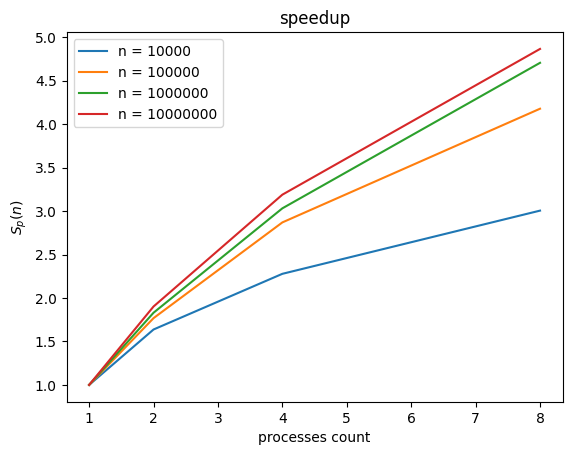

In [43]:
ps = [1, 2, 4, 8]

t10000s = [0.00257633, 0.00157332, 0.00113106, 0.000857449]
t100000s = [0.0297305, 0.0168159, 0.0103622, 0.00711814]
t1000000s = [0.34143, 0.186543, 0.112643, 0.0725748]
t10000000s = [3.99548, 2.10092, 1.25321, 0.821374]

def show_plot(n : int, ts : list[float]):
    Ss = [ts[0] / t for t in ts]
    plt.plot(ps, Ss, label=f"n = {n}")
    plt.xlabel("processes count")
    plt.ylabel("$S_p(n)$")

plt.title(f"speedup")
show_plot(10000, t10000s)
show_plot(100000, t100000s)
show_plot(1000000, t1000000s)
show_plot(10000000, t10000000s)
plt.legend()

**RadixSort**: $O(d \cdot n)$, где $d$ - количество разрядов(в данном случае 16-ричных)

Таким образом имеет смысл переходить на **RadixSort** в любом из процессов при условии $d < \alpha \log(n)$, но для uint64_t, $max\{d\} = 16$. Это условие начинает выполнятся достаточно быстро, и вычисление разрядности лишь мешает в случае малого размера масива. Поэтому условие было заменено на $n > n_0$.

Text(0.5, 1.0, '2 processes')

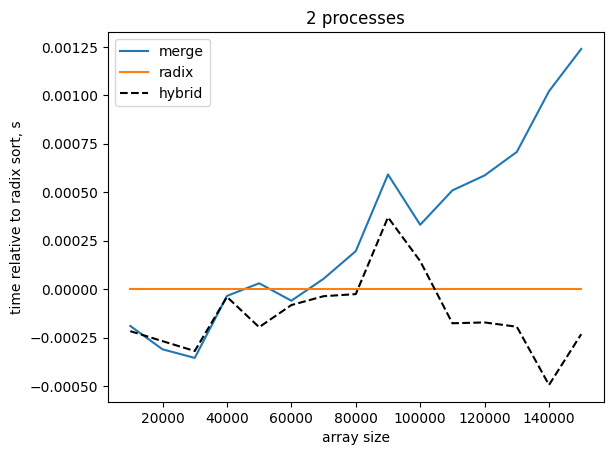

In [ ]:
ns = [1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
merge_sort_ts = [2.24e-4, 1.53e-3, 1.69e-2, 1.89e-1, 2.12, 23.92]
radix_sort_ts = [2.40e-4, 1.72e-3, 1.61e-2, 1.595e-1, 1.6673, 16.83]
hybrid_sort_ts = [2.16e-4, 1.56e-3, 1.68e-2, 1.58e-1, 1.70, 16.58]

ns = [1e4 * x for x in range(1, 16)]
merge_sort_ts = [0.00159155, 0.00289749, 0.00433589, 0.00617119, 0.00769613, 0.00928062, 0.0107543, 
                 0.0126433, 0.0143156, 0.0158282, 0.0172048, 0.0191457, 0.0204429, 0.0230101, 0.0239822]
radix_sort_ts = [0.00178133, 0.00320764, 0.00469027, 0.00620601, 0.00766568, 0.00934002, 0.0107007, 
                 0.012447, 0.0137238, 0.0154961, 0.0166952, 0.018559, 0.019735, 0.021989, 0.0227431]
hybrid_sort_ts = [0.00156492, 0.00293966, 0.00437144, 0.00616639, 0.00746976, 0.00925813, 0.0106645, 
                  0.0124216, 0.0140945, 0.0156407, 0.0165195, 0.0183875, 0.0195414, 0.0214953, 0.0225113]

merge_sort_ts = [x - y for x,y in  zip(merge_sort_ts, radix_sort_ts)]
hybrid_sort_ts = [x - y for x,y in  zip(hybrid_sort_ts, radix_sort_ts)]
radix_sort_ts = [x - y for x,y in  zip(radix_sort_ts, radix_sort_ts)]

plt.plot(ns, merge_sort_ts, label="merge")
plt.plot(ns, radix_sort_ts, label="radix")
plt.plot(ns, hybrid_sort_ts, "--", label="hybrid", color="black")
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("array size")
plt.ylabel("time relative to radix sort, s")
plt.legend()
plt.title("2 processes")